#Feature Selection
In this section, we aim to identify the most relevant features for predicting heart disease. Feature selection helps improve model accuracy by reducing noise and dimensionality, which leads to faster training and better generalization.

We will explore techniques to select key variables that contribute most to the prediction task, while eliminating redundant or irrelevant features.

Load Dataset and Import Libraries for Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

df = pd.read_csv('/content/processed_heart.csv')

#Feature Importance Using Random Forest
In this step, we separate the features (X) from the target variable (y). We scale the features using StandardScaler to normalize the data before fitting the model. Then, we train a RandomForestClassifier and extract feature importances to understand which features contribute most to the prediction. Finally, we visualize the feature importances using a bar plot.

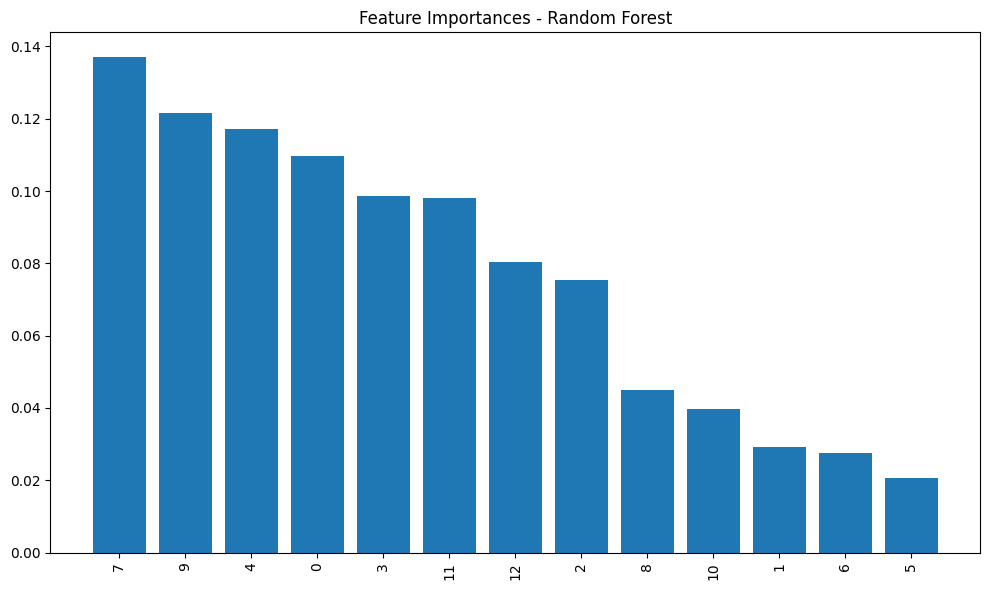

In [ ]:
X = df.drop('13', axis=1)
y = df['13']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_scaled, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_scaled.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

Print Feature Importances in Order

In [ ]:
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

7: 0.1371
9: 0.1217
4: 0.1171
0: 0.1098
3: 0.0987
11: 0.0980
12: 0.0803
2: 0.0754
8: 0.0449
10: 0.0397
1: 0.0293
6: 0.0276
5: 0.0205


#Feature Selection Using Recursive Feature Elimination (RFE)
This code applies Recursive Feature Elimination (RFE) with a Logistic Regression model to select the top 7 most important features. RFE works by recursively removing less important features and building the model repeatedly until the desired number of features is reached. The selected features are then printed out.

In [ ]:
model = LogisticRegression(max_iter=5000)
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X_scaled, y)

print("RFE Selected Features:")
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(X.columns[i])

RFE Selected Features:
2
6
7
9
10
11
12


#Feature Selection Using ANOVA F-test (SelectKBest)
This code uses the ANOVA F-test to select the top 7 features that have the strongest relationship with the target variable. The SelectKBest method ranks features based on their ANOVA F-scores, which measure how well each feature discriminates between the classes. The selected features are then printed

In [ ]:
f_selector = SelectKBest(f_classif, k=7)
X_kbest = f_selector.fit_transform(X, y)
mask = f_selector.get_support()
selected_features = X.columns[mask]
print("ANOVA F-test Selected Features:", selected_features)

ANOVA F-test Selected Features: Index(['2', '7', '8', '9', '10', '11', '12'], dtype='object')


#Creating a New Dataset with Selected Features
After selecting the important features using the ANOVA F-test, this code creates a new DataFrame that contains only these selected features plus the target variable. This reduced dataset can be used for further analysis or modeling.

In [ ]:
X_selected = X[selected_features]
df_selected = pd.concat([X_selected, y], axis=1)
print(df_selected.head())

          2         7         8         9        10        11        12  13
0 -2.251775  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004   0
1  0.877985 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238   2
2  0.877985 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752   1
3 -0.165268  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238   0
4 -1.208521  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238   0


#Saving the Selected Features Dataset
This line saves the new dataset with the selected features and target variable into a CSV file. This makes it easy to reuse the cleaned and feature-selected data later without repeating the selection process.

In [ ]:
from google.colab import files

df_selected.to_csv('selected_features.csv', index=False)

files.download('selected_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Scaling the Selected Features
In this step, we take the features selected previously and apply standard scaling to them. StandardScaler transforms the data so that each feature has a mean of 0 and a standard deviation of 1, which is important for many machine learning algorithms.

We then combine the scaled features with the target variable into a new DataFrame for further use or modeling.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files

# --- Step 1: Load selected column indices ---
selected_feature_indices = pd.read_csv('/content/selected_features.csv', header=None)[0].astype(int).tolist()

# --- Step 2: Make sure indices are valid ---
max_index = X.shape[1] - 1
selected_feature_indices = [i for i in selected_feature_indices if i <= max_index]

# --- Step 3: Select columns by position ---
X_selected = X.iloc[:, selected_feature_indices]
target = y

# --- Step 4: Scale features ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X_selected)
features_scaled_df = pd.DataFrame(features_scaled, columns=X_selected.columns)

# --- Step 5: Combine with target ---
df_scaled = pd.concat([features_scaled_df, target.reset_index(drop=True)], axis=1)

# --- Step 6: Save CSV and download ---
df_scaled.to_csv('scaled_selected_features.csv', index=False)
files.download('scaled_selected_features.csv')

# --- Step 7: Quick check ---
print(df_scaled.head())



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

          2         7         8         9        10        11        12  13
0 -2.251775  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004   0
1  0.877985 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238   2
2  0.877985 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752   1
3 -0.165268  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238   0
4 -1.208521  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238   0
